# DVH reconstruction from 3D dose grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from io import StringIO

%matplotlib inline

We would make DVH from 3D dose grid and exported structure bitmap.

In [2]:
# where 3D dose and bitmaps are
path2dosedata = Path("3ddose")

d3d       = path2dosedata / "XCISION-DM_Baseline_1_PatientKdd.3ddose"
ROIbitmap = path2dosedata / "XCISION-DM_Baseline_1_____3.bitmap"
print("Looking to make DVH using \nd3d: {0}\n                     with \nbitmap: {1}".format(d3d, ROIbitmap))

Looking to make DVH using 
d3d: 3ddose\XCISION-DM_Baseline_1_PatientKdd.3ddose
                     with 
bitmap: 3ddose\XCISION-DM_Baseline_1_____3.bitmap


## Helper code to load 3DDose and bitmap

In [3]:
def get_dimensions(line):
    """
    Parse and extract X, Y and Z dimensions from string
    :param line: line contains x, y, z dimensions
    :returns: tuple
    """
    split = line.split(" ")
    split = [x for x in split if x] # remove empty lines

    nx = int(split[0])
    ny = int(split[1])
    nz = int(split[2])

    return (nx, ny, nz)


def get_boundaries(n, line):
    """
    Parse and extract X, Y and Z boundaries from string
    :param n: number of bins (boundaries are one more)
    :param line: line contains boundaries data
    :returns: array of parsed boundaries
    """
    split = line.split(" ")
    split = [x for x in split if x]  # remove empty lines

    boundaries = np.empty(n+1, dtype = np.float32)

    for k in range(0, n+1):
        d = np.float32(split[k])
        boundaries[k] = d

    return boundaries


def get_3ddata(nx, ny, nz, line):
    """
    Read a line and convert it to 3D dose representation
    :param nx: nof X points
    :param ny: nof Y points
    :param nz: nof Z points
    :param line" string which contains all 3D dose data points
    :returns: 3D dose data as NumPy object
    """
    split = line.split(" ")
    split = [x for x in split if x]  # remove empty lines

    data = np.empty((nx, ny, nz), dtype = np.float32)

    k = 0
    for iz in range(0, nz):
        for iy in range(0, ny):
            for ix in range(0, nx):
                data[ix,iy,iz] = float(split[k])
                k += 1

    return data

### Reading 3d dose data

In [4]:
f = open(d3d, 'r')

#read in the dimensions
line = f.readline()
(nx, ny, nz) = get_dimensions(line)
print(nx, ny, nz)

line = f.readline()
bx = get_boundaries(nx, line)
print(bx)

line = f.readline()
by = get_boundaries(ny, line)
print(by)

line = f.readline()
bz = get_boundaries(nz, line)
print(bz)

lines = f.readlines()
sb = StringIO()
for line in lines:
    sb.write(line)
    
dose = get_3ddata(nx, ny, nz, sb.getvalue())
print(dose.shape)

f.close()

512 512 168
[-5.32227e-02  5.32227e-02  1.59668e-01  2.66113e-01  3.72559e-01
  4.79004e-01  5.85449e-01  6.91895e-01  7.98340e-01  9.04785e-01
  1.01123e+00  1.11768e+00  1.22412e+00  1.33057e+00  1.43701e+00
  1.54346e+00  1.64990e+00  1.75635e+00  1.86279e+00  1.96924e+00
  2.07568e+00  2.18213e+00  2.28857e+00  2.39502e+00  2.50146e+00
  2.60791e+00  2.71436e+00  2.82080e+00  2.92725e+00  3.03369e+00
  3.14014e+00  3.24658e+00  3.35303e+00  3.45947e+00  3.56592e+00
  3.67236e+00  3.77881e+00  3.88525e+00  3.99170e+00  4.09814e+00
  4.20459e+00  4.31104e+00  4.41748e+00  4.52393e+00  4.63037e+00
  4.73682e+00  4.84326e+00  4.94971e+00  5.05615e+00  5.16260e+00
  5.26904e+00  5.37549e+00  5.48193e+00  5.58838e+00  5.69482e+00
  5.80127e+00  5.90771e+00  6.01416e+00  6.12061e+00  6.22705e+00
  6.33350e+00  6.43994e+00  6.54639e+00  6.65283e+00  6.75928e+00
  6.86572e+00  6.97217e+00  7.07861e+00  7.18506e+00  7.29150e+00
  7.39795e+00  7.50439e+00  7.61084e+00  7.71729e+00  7.82373e+0

### Reading bitmap data

In [5]:
f = open(ROIbitmap, 'r')

#read in the dimensions
line = f.readline()
(nbx, nby, nbz) = get_dimensions(line)
print(nbx, nby, nbz)

line = f.readline()
bbx = get_boundaries(nbx, line)
print(bbx)

line = f.readline()
bby = get_boundaries(nby, line)
print(bby)

line = f.readline()
bbz = get_boundaries(nbz, line)
print(bbz)

lines = f.readlines()
sb = StringIO()
for line in lines:
    sb.write(line)
    
bitmap = get_3ddata(nbx, nby, nbz, sb.getvalue())
print(bitmap.shape)

f.close()

512 512 168
[-5.32226562e-01  5.32226562e-01  1.59667969e+00  2.66113281e+00
  3.72558594e+00  4.79003906e+00  5.85449219e+00  6.91894531e+00
  7.98339844e+00  9.04785156e+00  1.01123047e+01  1.11767578e+01
  1.22412109e+01  1.33056641e+01  1.43701172e+01  1.54345703e+01
  1.64990234e+01  1.75634766e+01  1.86279297e+01  1.96923828e+01
  2.07568359e+01  2.18212891e+01  2.28857422e+01  2.39501953e+01
  2.50146484e+01  2.60791016e+01  2.71435547e+01  2.82080078e+01
  2.92724609e+01  3.03369141e+01  3.14013672e+01  3.24658203e+01
  3.35302734e+01  3.45947266e+01  3.56591797e+01  3.67236328e+01
  3.77880859e+01  3.88525391e+01  3.99169922e+01  4.09814453e+01
  4.20458984e+01  4.31103516e+01  4.41748047e+01  4.52392578e+01
  4.63037109e+01  4.73681641e+01  4.84326172e+01  4.94970703e+01
  5.05615234e+01  5.16259766e+01  5.26904297e+01  5.37548828e+01
  5.48193359e+01  5.58837891e+01  5.69482422e+01  5.80126953e+01
  5.90771484e+01  6.01416016e+01  6.12060547e+01  6.22705078e+01
  6.33349609e

## Building DVH

### First, lets find dmax

In [6]:
dmax = np.amax(dose)
print(dmax)

bmax = np.amax(bitmap)
print(bmax)
bsum = np.sum(bitmap)
print(bsum)

10.8396
1.0
1375887.0


### Now make histogram

In [28]:
nitems = int(bsum + 0.5)
print(nitems)

droi = dose[np.array(bitmap, dtype=bool)]

1375887


In [29]:
print(droi)                
print(len(droi))

[1.15817 1.16228 1.16228 ... 1.16659 1.16157 1.15517]
1375887


In [23]:
hist, bins = np.histogram(droi, bins = 200, range=(0.0, dmax))
print(hist)
print(bins)

[    0     0     0     0     0     5    55   165   269   420   569   862
   927  1119  1220  1445  1642  1829  2200  2808  6545 12761 15602 17553
 18768 19707 20809 21405 21658 22243 22787 22630 22782 22306 21457 20103
 19234 18399 17598 16989 16267 15306 14838 13628 13589 13151 12642 11830
 11654 11313 11042 10713 10554  9742  9736  9649  9479  8858  8638  8424
  8287  8165  7834  7975  7672  7883  7566  7451  7264  7245  7001  7323
  7002  7134  6924  6969  6953  7012  6891  6624  6424  6455  6107  6334
  6448  6017  6103  6234  5845  5848  5837  5416  5532  5828  5592  5240
  5074  5155  5207  5067  4972  4997  4992  5061  4967  4945  4698  4655
  4675  4612  4474  4467  4625  4443  4479  4299  4230  4253  4041  4210
  3917  4099  3855  4029  4246  3916  3959  3848  4074  3935  4058  3980
  3848  3957  3635  3783  3691  3761  4188  3994  3973  3928  3541  3596
  3808  3616  3741  3616  3300  3536  3636  3565  3634  3637  3613  3859
  3776  3792  3997  3965  3924  3738  3734  3873  3

In [24]:
dvh = np.flip(np.cumsum(np.flip(hist)))
print(dvh)

[1375887 1375887 1375887 1375887 1375887 1375887 1375882 1375827 1375662
 1375393 1374973 1374404 1373542 1372615 1371496 1370276 1368831 1367189
 1365360 1363160 1360352 1353807 1341046 1325444 1307891 1289123 1269416
 1248607 1227202 1205544 1183301 1160514 1137884 1115102 1092796 1071339
 1051236 1032002 1013603  996005  979016  962749  947443  932605  918977
  905388  892237  879595  867765  856111  844798  833756  823043  812489
  802747  793011  783362  773883  765025  756387  747963  739676  731511
  723677  715702  708030  700147  692581  685130  677866  670621  663620
  656297  649295  642161  635237  628268  621315  614303  607412  600788
  594364  587909  581802  575468  569020  563003  556900  550666  544821
  538973  533136  527720  522188  516360  510768  505528  500454  495299
  490092  485025  480053  475056  470064  465003  460036  455091  450393
  445738  441063  436451  431977  427510  422885  418442  413963  409664
  405434  401181  397140  392930  389013  384914  3

### Normalization

In [25]:
dvh = dvh / np.float32(nitems) * np.float32(100.0)
print(dvh)

[1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
 1.00000000e+02 1.00000000e+02 9.99996366e+01 9.99956392e+01
 9.99836469e+01 9.99640959e+01 9.99335701e+01 9.98922150e+01
 9.98295645e+01 9.97621898e+01 9.96808604e+01 9.95921903e+01
 9.94871672e+01 9.93678260e+01 9.92348936e+01 9.90749967e+01
 9.88709102e+01 9.83952170e+01 9.74677426e+01 9.63337832e+01
 9.50580244e+01 9.36939589e+01 9.22616465e+01 9.07492403e+01
 8.91935166e+01 8.76194048e+01 8.60027749e+01 8.43466070e+01
 8.27018498e+01 8.10460452e+01 7.94248365e+01 7.78653334e+01
 7.64042396e+01 7.50063050e+01 7.36690586e+01 7.23900291e+01
 7.11552620e+01 6.99729702e+01 6.88605242e+01 6.77820926e+01
 6.67916043e+01 6.58039505e+01 6.48481307e+01 6.39293052e+01
 6.30694963e+01 6.22224790e+01 6.14002458e+01 6.05977090e+01
 5.98190840e+01 5.90520152e+01 5.83439628e+01 5.76363466e+01
 5.69350535e+01 5.62461161e+01 5.56023133e+01 5.49745001e+01
 5.43622405e+01 5.37599381e+01 5.31665028e+01 5.25971246e+01
 5.20174985e+01 5.145989

<BarContainer object of 200 artists>

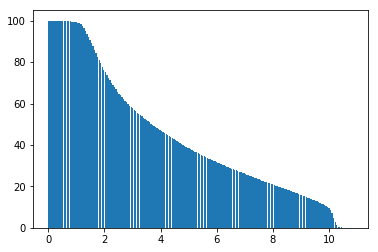

In [26]:
width = 0.90 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, dvh, align='center', width = width)